### Load the dataset into your jupyter notebook

In [1]:
import pandas as pd
df = pd.read_csv('india_weather_data.csv')

In [2]:
for i in df.columns:
  print(i)

Unnamed: 0
date_of_record
month
season
station_name
state
district
avg_temp
min_temp
max_temp
wind_speed
air_pressure
elevation
latitude
longitude
rainfall


In [3]:
df.shape

(970339, 16)

## Dataset Overview

#### This dataset consists of rainfall data for **36 subdivisons across India** over a span of years 1901 upto 2017.

#### The dataset contains 4188+ records and includes the following features
---
Here’s a clear explanation of each term you listed — these are commonly found in weather or climate datasets:

---

### 🌦️ **Weather and Climate Data Fields Explained**

| **Field**         | **Description** |
|------------------|-----------------|
| **date_of_record** | The specific calendar date when the weather data was recorded. |
| **month**          | The month of the year corresponding to the record. Useful for seasonal analysis. |
| **season**         | The meteorological or regional season (e.g., `Winter`, `Monsoon`, `Summer`). May vary by geography. |
| **station_name**   | The name of the weather station that collected the data. |
| **state**          | The state or province where the station is location. |
| **district**       | The administrative district within the state. |
| **avg_temp**       | The average temperature recorded on that day, typically in degrees Celsius. |
| **min_temp**       | The minimum temperature observed during the day. |
| **max_temp**       | The maximum temperature observed during the day. |
| **wind_speed**     | The average wind speed, usually measured in kilometers per hour (km/h) or meters per second (m/s). |
| **air_pressure**   | Atmospheric pressure at the station, typically in hectopascals (hPa) or millibars. |
| **elevation**      | The height of the station above sea level, usually in meters. Affects temperature and pressure readings. |
| **latitude**       | Geographic coordinate specifying north-south position . |
| **longitude**      | Geographic coordinate specifying east-west position. |
| **rainfall**       | Total precipitation recorded on that day, usually in millimeters (mm). |

---



--- 
## 1. Time Series Analysis (Rainfall Over Time)
-	which month has the highest average rainfall
-	How does the frequency of rainy days in differs in different seasons (e.g., days with rainfall > 1 mm)?
-	Frequency of rainy days in each month (days with rainfall > 1 mm)
-	What is the average rainfall for each specific year in the dataset? Is there a noticeable upward or downward trend?
## 2. Geographical Analysis (Rainfall in Space) 
-	 Which are the top 5 states that has the highest average daily rainfall across all its stations? 
-	Which are the top 5 unique stations that has the most "rainy days" (days with rainfall > 1 mm) in a single year? 
-	 Is there a clear relationship between latitude and average rainfall? 
-	Which are the top 10 states that exhibits the most extreme rainfall events (rainfall > 100 mm)?
-	What is the average rainfall for stations above 1000m elevation compared to those below 100m?
-	the elevation of place with highest rainfall (top 10)

## 3. Distribution Analysis (Rainfall Frequency) 
-	 What percentage of all recorded that days had zero rainfall?
-	What percentage of the total, cumulative rainfall in the dataset comes from days with over 50 mm of rain?
-	Ignoring days with no rain, what is the most common range of rainfall (e.g., 1-10 mm, 10-20 mm, etc.)?
## 4. Correlative Analysis (Rainfall vs. Other Weather) 
-	What is the average air_pressure on days with heavy rain (> 50 mm) compared to dry days (0 mm)?
-	Is higher rainfall associated with a larger daily temperature range (max_temp - min_temp)?
-	 What is the maximum,minimum and average wind_speed during the top 5% of rainfall events?
-	Is there a specific avg_temp range where rainfall is most likely to occur?
-	How does the correlation between rainfall and air_pressure,windspeed and elevation differ between different seasons?
-	how does the correlation between rainfall and avg_temp,min_temp,max_temp differ between different seasons?
---

In [216]:
#Check the number of null values in the dataset
df.isna().sum()

Unnamed: 0        0
date_of_record    0
month             0
season            0
station_name      0
state             0
district          0
avg_temp          0
min_temp          0
max_temp          0
wind_speed        0
air_pressure      0
elevation         0
latitude          0
longitude         0
rainfall          0
week              0
year              0
temp_range        0
dtype: int64

Dataset basic info:

In [217]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970339 entries, 0 to 970338
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      970339 non-null  int64         
 1   date_of_record  970339 non-null  datetime64[ns]
 2   month           970339 non-null  object        
 3   season          970339 non-null  object        
 4   station_name    970339 non-null  object        
 5   state           970339 non-null  object        
 6   district        970339 non-null  object        
 7   avg_temp        970339 non-null  float64       
 8   min_temp        970339 non-null  float64       
 9   max_temp        970339 non-null  float64       
 10  wind_speed      970339 non-null  float64       
 11  air_pressure    970339 non-null  float64       
 12  elevation       970339 non-null  int64         
 13  latitude        970339 non-null  float64       
 14  longitude       970339 non-null  flo

In [218]:
# first 5 rows of dataset
df.head(5)

,Unnamed: 0,date_of_record,month,season,station_name,state,district,avg_temp,min_temp,max_temp,wind_speed,air_pressure,elevation,latitude,longitude,rainfall,week,year,temp_range
0,0,2021-01-02,January,Winter,Gulmarg,JK,Baramulla,-2.2,-6.6,-0.8,2.2,1020.0,2652,34.05,74.4,0.1,2020-12-28,2021,5.8
1,1,2021-01-03,January,Winter,Gulmarg,JK,Baramulla,-3.6,-4.6,-1.8,3.7,1019.5,2652,34.05,74.4,4.4,2020-12-28,2021,2.8
2,2,2021-01-04,January,Winter,Gulmarg,JK,Baramulla,-3.0,-4.5,-1.1,2.1,1022.0,2652,34.05,74.4,2.3,2021-01-04,2021,3.4
3,3,2021-01-05,January,Winter,Gulmarg,JK,Baramulla,-3.3,-5.1,-1.2,2.8,1015.6,2652,34.05,74.4,35.0,2021-01-04,2021,3.9
4,4,2021-01-06,January,Winter,Gulmarg,JK,Baramulla,-3.9,-8.3,-1.0,3.4,1015.3,2652,34.05,74.4,25.5,2021-01-04,2021,7.3


### DATA PREPROCESSING

### Null value handling

We have to remove the null values from the dataset appropriately by filling them with value or removing the row / column completely

In [219]:
#check the percentage number of null values in dataset
null_counts = df.isna().sum()
total_rows = len(df)

for column, count in null_counts.items():
  percent = (count / total_rows) * 100
  print(f"{column} = {percent:.2f}% null values")

Unnamed: 0 = 0.00% null values
date_of_record = 0.00% null values
month = 0.00% null values
season = 0.00% null values
station_name = 0.00% null values
state = 0.00% null values
district = 0.00% null values
avg_temp = 0.00% null values
min_temp = 0.00% null values
max_temp = 0.00% null values
wind_speed = 0.00% null values
air_pressure = 0.00% null values
elevation = 0.00% null values
latitude = 0.00% null values
longitude = 0.00% null values
rainfall = 0.00% null values
week = 0.00% null values
year = 0.00% null values
temp_range = 0.00% null values


### The percentage of null values are as follows:
---
* min_temp has 4.52% null value
* max_temp has 11.40% null values
* wind_speed has 28.28% null values
* air_pressure has 31.40% null values
* rainfall has 26.54% null values
---
We have to find a strategy to fill the null values. Since the **District** is not having null values, we can use it as a unique value to group and fill null values accordingly. But the data is prone to be inconsistent if we use only district name, because climate is different in different months / seasons. So we have to group the data with **District** and **Month**. We can fill the mean value at the null's place


### Group the dataset based on district,station name and month, then we have to find the mean to fill the null values

In [220]:
mean_min_temp = df.groupby(['district','station_name', 'month'])['min_temp'].mean()
df['min_temp'] = df['min_temp'].fillna(df.apply(lambda x: mean_min_temp[x['district'], x['station_name'], x['month']], axis=1))

In [221]:
df.isna().sum()

Unnamed: 0        0
date_of_record    0
month             0
season            0
station_name      0
state             0
district          0
avg_temp          0
min_temp          0
max_temp          0
wind_speed        0
air_pressure      0
elevation         0
latitude          0
longitude         0
rainfall          0
week              0
year              0
temp_range        0
dtype: int64

### Repeat the same for max_temp, windspeed, air_pressure and rainfall

In [222]:
mean_max_temp = df.groupby(['district','station_name', 'month'])['max_temp'].mean()
df['max_temp'] = df['max_temp'].fillna(df.apply(lambda x: mean_max_temp[x['district'], x['station_name'], x['month']], axis=1))

In [223]:
mean_windspeed =df.groupby(['district','station_name', 'month'])['wind_speed'].mean()
df['wind_speed']=df['wind_speed'].fillna(df.apply(lambda x: mean_windspeed[x['district'], x['station_name'], x['month']], axis=1))

In [224]:
mean_airpressure = df.groupby(['district','station_name', 'month'])['air_pressure'].mean()
df['air_pressure']=df['air_pressure'].fillna(df.apply(lambda x: mean_airpressure[x['district'], x['station_name'], x['month']], axis=1))

In [225]:
mean_rainfall = df.groupby(['district','station_name', 'month'])['rainfall'].mean()
df['rainfall']=df['rainfall'].fillna(df.apply(lambda x: mean_rainfall[x['district'], x['station_name'], x['month']], axis=1))

### Check if there are any null values left

In [226]:
df.isna().sum()

Unnamed: 0        0
date_of_record    0
month             0
season            0
station_name      0
state             0
district          0
avg_temp          0
min_temp          0
max_temp          0
wind_speed        0
air_pressure      0
elevation         0
latitude          0
longitude         0
rainfall          0
week              0
year              0
temp_range        0
dtype: int64

In [227]:
df.shape

(970339, 19)

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

---
> # 1. Time Series Analysis (Rainfall Over Time) 
> - Which month, on average, has the highest total rainfall?
> 
> - How does the frequency of rainy days (e.g., days with rainfall > 1 mm) change from season to season?
> 
> - frequency of rainy days in each month ( days with rainfall > 1 mm)
> 
> - What is the average rainfall for each specific year in the dataset? Is there a noticeable upward or > downward trend?
> 
> - What is the longest recorded continuous period (in days) with zero rainfall?
> 
> - Which 10-day period of the year (e.g., first 10 days of July) has the highest average rainfall across all years?
> 
> - Rainfall distribution for each month
---

C:\Users\sreev\AppData\Local\Temp\ipykernel_26548\1478503558.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rainfall_by_month = df.groupby('month')['rainfall'].mean().reset_index()


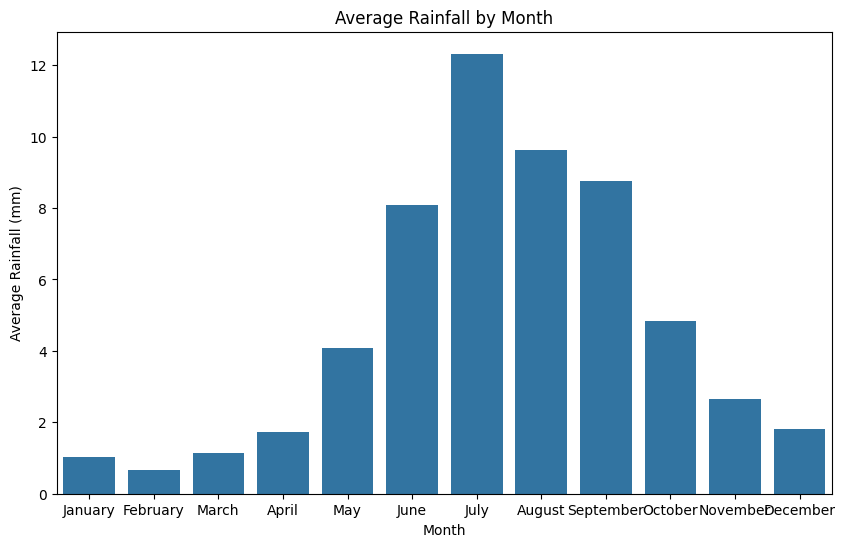

In [235]:
# which month has the highest average rainfall

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)


avg_rainfall_by_month = df.groupby('month')['rainfall'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='rainfall', data=avg_rainfall_by_month)
plt.title('Average Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.show()

> Key insights
- July is the wettest month, with average rainfall over 12 mm
- The period from June to September clearly represents the main rainy season.
- February is the driest month (almost no rain), part of a dry spell from December to March.
---

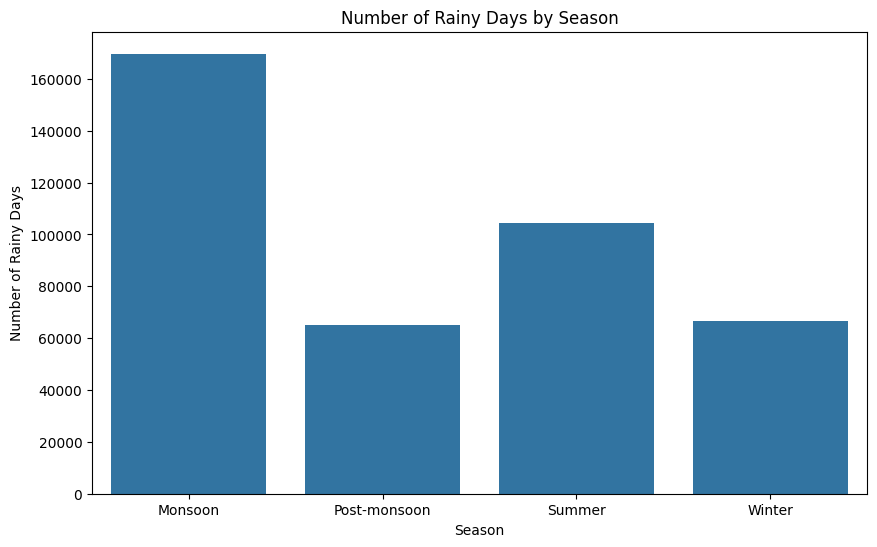

In [230]:
# How does the frequency of rainy days in differs in different seasons (e.g., days with rainfall > 1 mm) ?
rainy_days = df[df['rainfall'] > 1]
rainy_days_by_season = rainy_days.groupby('season').size().reset_index(name='rainy_days_count')
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='rainy_days_count', data=rainy_days_by_season)
plt.title('Number of Rainy Days by Season')
plt.xlabel('Season')
plt.ylabel('Number of Rainy Days')
plt.show()

> Key inisghts
- The Monsoon season has the highest number of rainy days by far, with over 160,000.

- Summer is the second-rainiest season.

- The Post-monsoon and Winter seasons have the fewest rainy days, with Post-monsoon having the lowest number.

---

C:\Users\sreev\AppData\Local\Temp\ipykernel_26548\3970384333.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rainy_days_per_month = df[df['rainfall'] > 1].groupby('month').size().reset_index(name='rainy_days_count')


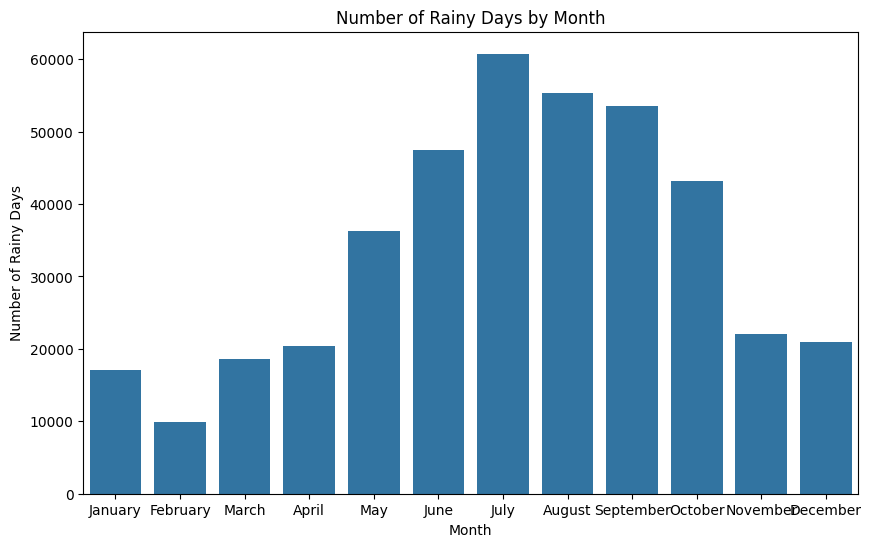

In [236]:
# Frequency of rainy days in each month (days with rainfall > 1 mm)

rainy_days_per_month = df[df['rainfall'] > 1].groupby('month').size().reset_index(name='rainy_days_count')
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='rainy_days_count', data=rainy_days_per_month)
plt.title('Number of Rainy Days by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rainy Days')
plt.show()

> Key insights
- July has the highest number of rainy days, with over 60,000.

- The period from June to September has the most frequent rainfall.

- February has the fewest rainy days (around 10,000).

- The chart clearly shows the number of rainy days rising through spring, peaking in mid-summer, and falling off through autumn and winter

<strong> Nb: </strong> This calculates the total count of rain happened in different locations

---

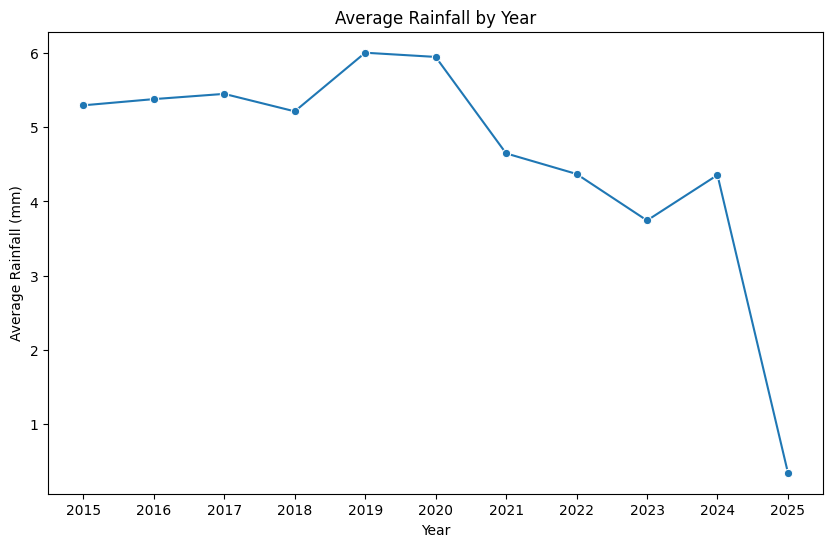

In [244]:
# What is the average rainfall for each specific year in the dataset? Is there a noticeable upward or downward trend?
avg_rainfall_by_year = df.groupby('year')['rainfall'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='year', y='rainfall', data=avg_rainfall_by_year, marker='o')
ax.set_xticks(avg_rainfall_by_year['year'])
plt.title('Average Rainfall by Year')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.show()

> #### Key insights

- The 2025 data point is an outlier. This data is incomplete. The sharp drop to near zero is an result of averaging over a partial year and does not reflect an actual trend.

- The highest average rainfall occurred in 2019 and 2020, both around 6 mm.

-  After the 2020 peak, there was a consistent downward trend in average rainfall, dropping from 6.0 mm to a low of about 3.8 - 4 mm in 2023.

- The year 2024 showed a partial recovery, with the average rainfall bouncing back up to around 4.5 mm.

- The years 2015-2018 were relatively stable, with average rainfall fluctuating in a narrow range between 5.2 mm and 5.5 mm.

---
---
---

---
> # 2. Geographical Analysis (Rainfall in Space) 
> - Which state has the highest average daily rainfall across all its stations? (top 5)
> 
> - Which specific station_name has the most "rainy days" (days with rainfall > 1 mm) in a single year?
> 
> - Is there a clear relationship between latitude and average rainfall? (i.e., Do northern or southern areas get more rain?)
> 
> - Which state exhibits the most extreme rainfall events (has the highest number of days with rainfall 100 mm)?
> 
> - What is the average rainfall for stations above 1000m elevation compared to those below 100m?
> 
> - the elevation of place with highest rainfall (top 10)

---

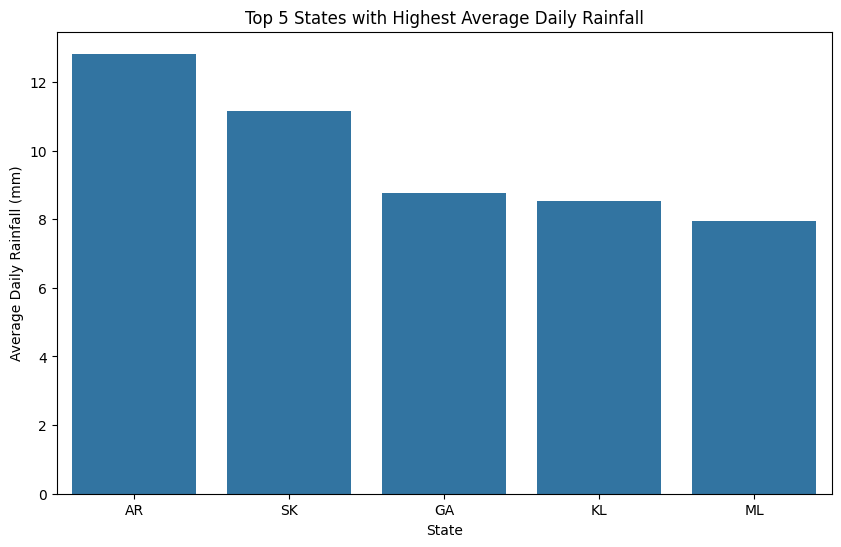

In [233]:
# Which state has the highest average daily rainfall across all its stations? (top 5)
avg_rainfall_by_state = df.groupby('state')['rainfall'].mean().reset_index()
top_states = avg_rainfall_by_state.nlargest(5, 'rainfall')
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='rainfall', data=top_states)
plt.title('Top 5 States with Highest Average Daily Rainfall')
plt.xlabel('State')
plt.ylabel('Average Daily Rainfall (mm)')
plt.show()

> ### Key insights
- Arunachal Pradesh had the highest average daily rainfall
- Arunachal and Sikkim are on par with each other with over 11mm daily rainfall on average 
- Followed by them Goa, Kerala and Meghalaya on 3rd,4th and 5th place respectively

---

Top 5 unique stations with most rainy days in a single year:
            station_name  year  rainy_days_count
2537            Srinagar  2016               578
545          Car Nicobar  2021               564
2620  Thiruvananthapuram  2015               525
1670             Madurai  2016               484
56                 Akola  2015               398


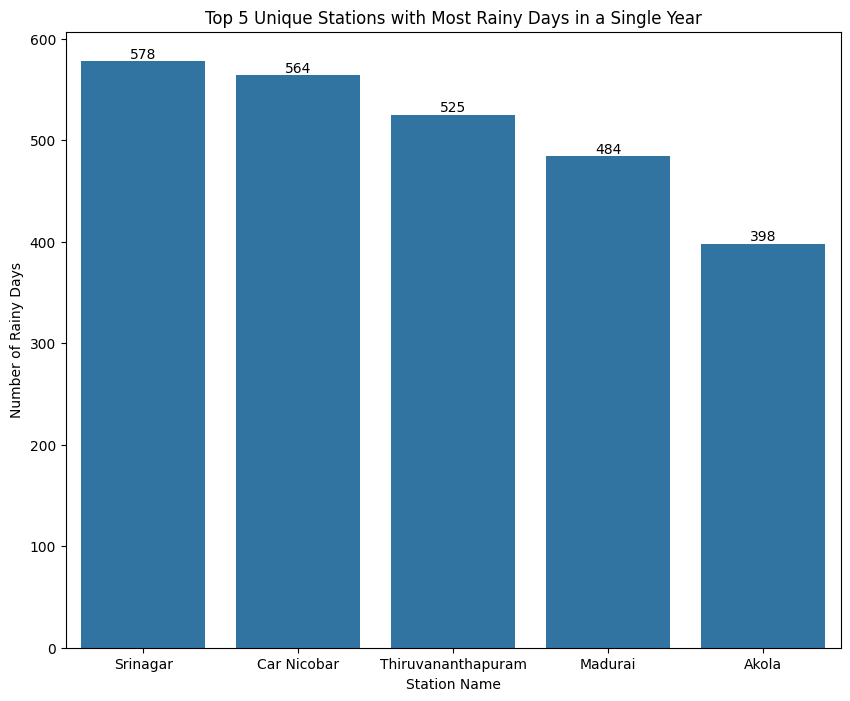

In [ ]:
# Top 5 unique stations with most rainy days in a single year:

rainy_days_per_station = df[df['rainfall'] > 1].groupby(['station_name', 'year']).size().reset_index(name='rainy_days_count')
sorted_rainy_days = rainy_days_per_station.sort_values(by='rainy_days_count', ascending=False)

# Drop duplicate station names, keeping the highest rainy_days_count per station
top_unique_stations = sorted_rainy_days.drop_duplicates(subset='station_name').head(5)

print("Top 5 unique stations with most rainy days in a single year:")
print(top_unique_stations)

#plotting the top 5 unique stations with most rainy days in a single year
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='station_name', y='rainy_days_count', data=top_unique_stations)
ax.bar_label(ax.containers[0], label_type='edge',color='black')
plt.title('Top 5 Unique Stations with Most Rainy Days in a Single Year')
plt.xlabel('Station Name')
plt.ylabel('Number of Rainy Days')
plt.show()

> ### Key insights
- Srinagar (Kashmir) has the highest number of rainy days at 578, followed very closely by Car Nicobar (Andaman and Nicobar islands) at 564.
- Thiruvananthapuram (kerala with 525), Madurai (Tamil Nadu with 484), and Akola (Maharashta at 398) complete the top 5.

---

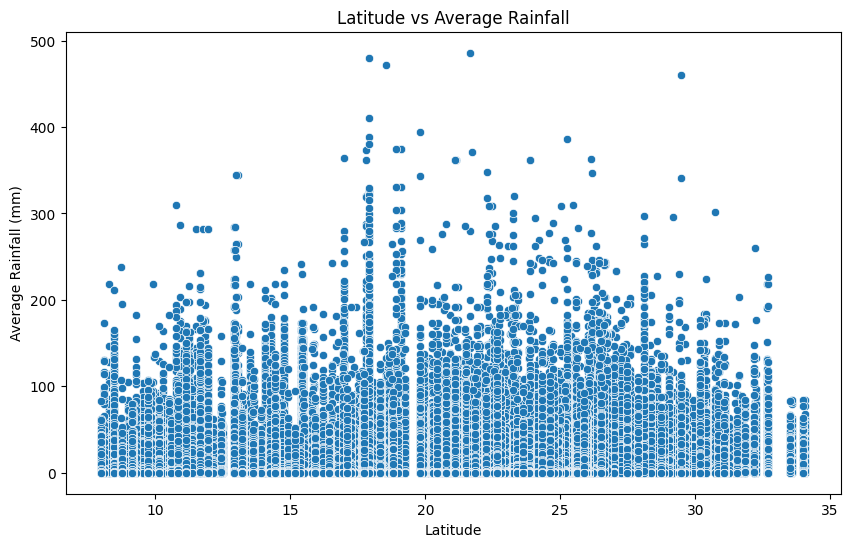

In [208]:
# Is there a clear relationship between latitude and average rainfall? 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='rainfall', data=df)
plt.title('Latitude vs Average Rainfall')
plt.xlabel('Latitude')
plt.ylabel('Average Rainfall (mm)')
plt.show()

> ### Key insights
- There are no visible correlation between latitude and rainfall
- This indicate that location is not a factor and both North as well as South has consistent rain
---

Top 10 states with most extreme rainfall events:


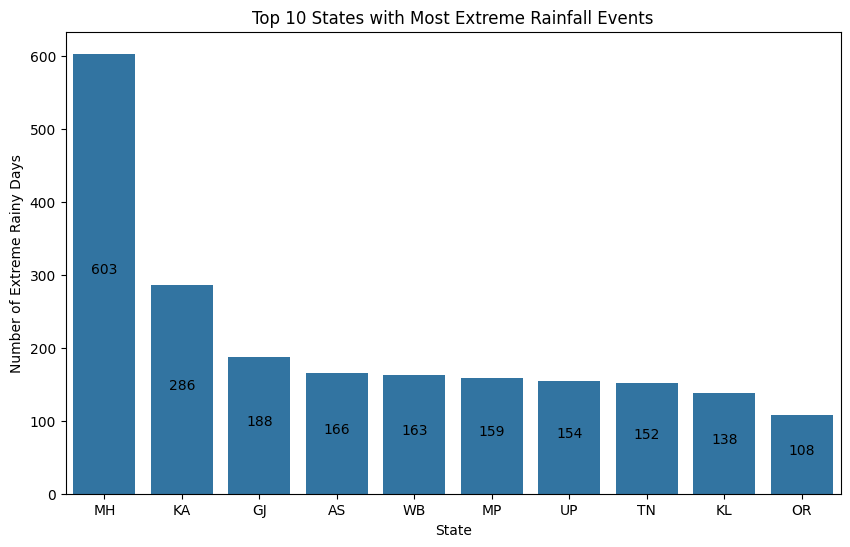

In [103]:
# Which states (top 10) exhibits the most extreme rainfall events (has the highest number of days with rainfall > 100 mm)?
extreme_rainy_days = df[df['rainfall'] > 100].groupby('state').size().reset_index(name='extreme_rainy_days_count')
top_extreme_states = extreme_rainy_days.nlargest(10, 'extreme_rainy_days_count')
print("Top 10 states with most extreme rainfall events:")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='state', y='extreme_rainy_days_count', data=top_extreme_states)
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', padding=3)
plt.title('Top 10 States with Most Extreme Rainfall Events')
plt.xlabel('State')
plt.ylabel('Number of Extreme Rainy Days')
plt.show()

> ### Key Insights
- The state MH (Maharashtra) has a vastly higher number of extreme rainy days (603) than any other state.
- Maharashtra's total is more than double the amount of the second-ranked state, KA (Karnataka), which has 286.
- Remaining states are experiencing more or less similar amount of extreme rainfall
---

In [209]:
# What is the average rainfall for stations above 1000m elevation compared to those below 100m?
high_elevation_avg = df[df['elevation'] > 1000]['rainfall'].mean()
low_elevation_avg = df[df['elevation'] < 100]['rainfall'].mean()
print(f"Average Rainfall for stations above 1000m elevation: {high_elevation_avg:.2f} mm")
print(f"Average Rainfall for stations below 100m elevation: {low_elevation_avg:.2f} mm")

Average Rainfall for stations above 1000m elevation: 6.12 mm
Average Rainfall for stations below 100m elevation: 5.67 mm


> ### Key Insights
- Stations at high elevations (above 1000m) receive slightly more rainfall on average (6.12 mm) than stations at low elevations (below 100m), which average 5.67 mm.
---

Elevation of Top 10 Stations with Highest Rainfall:
              station_name  elevation
70990    Mukteshwar Kumaon       2310
266755         Cherrapunji       1312
444342           Porbandar          5
550037       Bombay / Juhu          4
553731  Bombay / Santacruz          8
583190                Puri          5
586533     Bombay / Colaba         10
593928               Poona        555
620726              Harnai         17
627407       Mahabaleshwar       1384


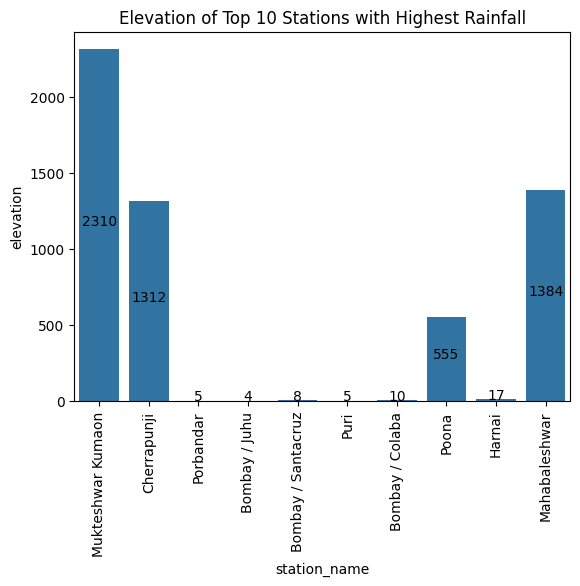

In [246]:
# the elevation of place with highest rainfall (top 10)
top_10_rainfall_stations = df.groupby('station_name')['rainfall'].max().nlargest(10)
top_10_rainfall_stations = list(top_10_rainfall_stations.index)
elevation_data = df[df['station_name'].isin(top_10_rainfall_stations)][['station_name', 'elevation']].drop_duplicates()
print("Elevation of Top 10 Stations with Highest Rainfall:")
print(elevation_data)
plt.Figure(figsize=(10, 6))
ax = sns.barplot(x='station_name', y='elevation', data=elevation_data)
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', padding=3)
plt.title("Elevation of Top 10 Stations with Highest Rainfall")
plt.xticks(rotation=90)
plt.show()

> ### Key Insights
- This chart clearly shows that the "Top 10 Stations with Highest Rainfall" are found at both very high elevations and at sea level.
- Mukteshwar Kumaon(2310m),Mahabaleshwar (1384m), and Cherrapunji (1312m) are all high altitude and experience high rainfall
- Porbandar, the Bombay Santacuz, Puri, and Harnai are at sea level and they experience high rainfall as well
- This confirms that heavy rainfall can occure at both sea level and mountains

---
---
---

---
> ### 3. Distribution Analysis (Rainfall Frequency)
>
> - What percentage of all recorded days had zero rainfall?
>
> - How does the shape of the rainfall distribution (on a histogram) differ between the 'Monsoon' and 'Post-Monsoon' seasons?
>
> - What percentage of the total, cumulative rainfall in the dataset comes from days with over 50 mm of rain?
>
> - Ignoring days with no rain, what is the most common range of rainfall (e.g., 1-10 mm, 10-20 mm, etc.)?
---

Percentage of days with zero rainfall: 37.97%


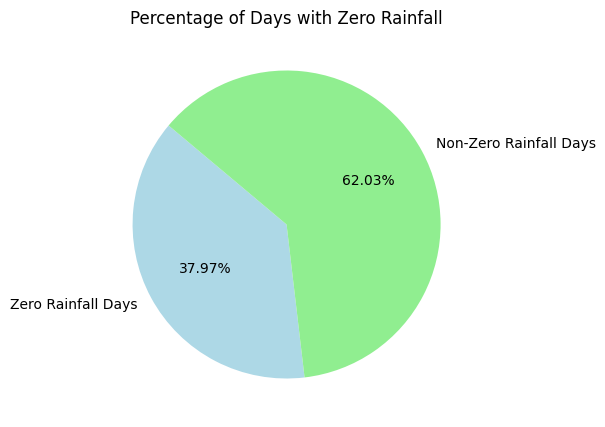

In [128]:
# What percentage of all recorded days had zero rainfall?
total_days = len(df)
zero_rainfall_days = len(df[df['rainfall'] == 0])
percentage_zero_rainfall = (zero_rainfall_days / total_days) * 100
print(f"Percentage of days with zero rainfall: {percentage_zero_rainfall:.2f}%")

labels = ['Zero Rainfall Days', 'Non-Zero Rainfall Days']
sizes = [zero_rainfall_days, total_days - zero_rainfall_days]
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Days with Zero Rainfall')
plt.show()

> ### Key Insights
- It is more common to have a day with rain than a completely dry day in this dataset.
- Around 62 % are Zero rainfall/rainy day and remaining 38% is Dry day

---

Percentage of total rainfall from days with over 50 mm of rain: 24.55%


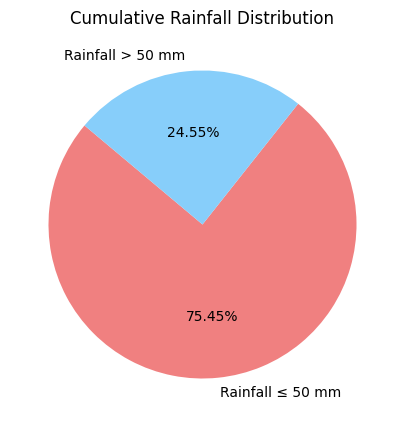

In [ ]:
# What percentage of the total, cumulative rainfall in the dataset comes from days with over 50 mm of rain?
total_rainfall = df['rainfall'].sum()
rainfall_over_50mm = df[df['rainfall'] > 50]['rainfall'].sum()
percentage_rainfall_over_50mm = (rainfall_over_50mm / total_rainfall) * 100
print(f"Percentage of total rainfall from days with over 50 mm of rain: {percentage_rainfall_over_50mm:.2f}%")
plt.figure(figsize=(5, 5))
labels = ['Rainfall ≤ 50 mm', 'Rainfall > 50 mm']
sizes = [total_rainfall - rainfall_over_50mm, rainfall_over_50mm]
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Cumulative Rainfall Distribution')
plt.show()

> ### Key Insights
- 75.45% Shows that rain is light-moderate rain
- Heavy rain (more than 50mm) is aminority of 24.55%
---

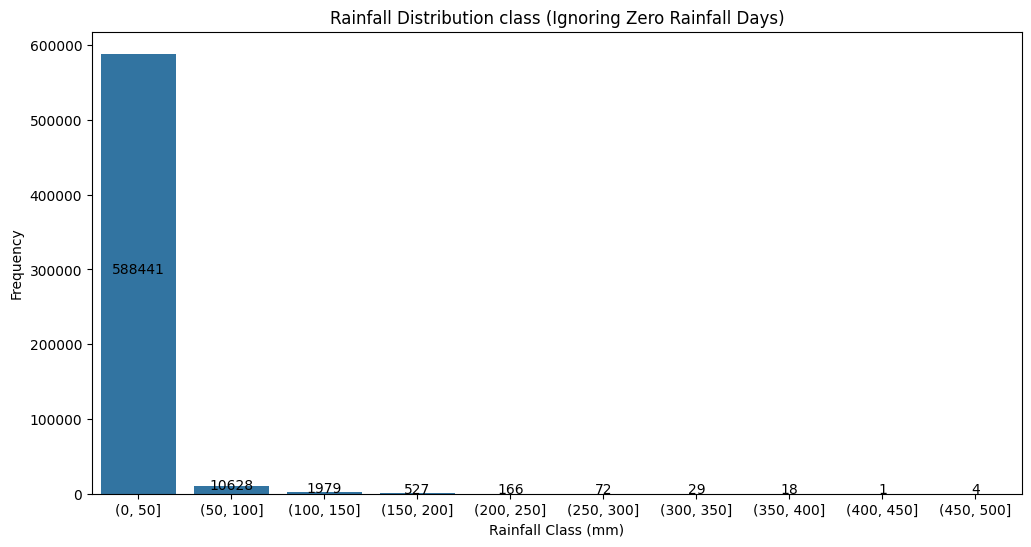

In [247]:
# Ignoring days with no rain, what is the most common class of rainfall (e.g., 1-10 mm, 10-20 mm, etc.)?
rainfall_class = pd.cut(df[df['rainfall'] > 0]['rainfall'], bins=range(0, 501, 50))
bucket_counts = rainfall_class.value_counts().sort_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bucket_counts.index.astype(str), y=bucket_counts.values)
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', padding=3)
plt.title('Rainfall Distribution class (Ignoring Zero Rainfall Days)')
plt.xlabel('Rainfall Class (mm)')
plt.ylabel('Frequency')
plt.show()

> ### Key Insights
- When it does rain, it is  likely to be light-to-moderate. The (0, 50 mm) 588,441 of all rains.
- Heavy rain is rare and extreme ones are very very rare
---
---
---

---
> ### 4. Correlative Analysis (Rainfall vs. Other factors) 
> - What is the average air_pressure on days with heavy rain (> 50 mm) compared to dry days (0 mm)?
> 
> - Is higher rainfall associated with a larger daily temperature range (max_temp - min_temp)?
> 
> - What is the maximum,minimum and average wind_speed during the top 5% of rainfall events?
> 
> - Is there a specific avg_temp range where rainfall is most likely to occur?
> 
> - How does the correlation between rainfall and air_pressure,windspeed and elevation differ between different seasons?
> 
> - how does the correlation between rainfall and avg_temp,min_temp,max_temp differ between different seasons?
>
--- 

In [249]:
# What is the average air_pressure on days with heavy rain (> 50 mm) compared to dry days (0 mm)?
avg_air_pressure_heavy_rain = df[df['rainfall'] > 50]['air_pressure'].mean()
avg_air_pressure_no_rain = df[df['rainfall'] == 0]['air_pressure'].mean()
print(f"Average Air Pressure on days with heavy rain (>50mm): {avg_air_pressure_heavy_rain:.2f} hPa")
print(f"Average Air Pressure on days with no rain: {avg_air_pressure_no_rain:.2f} hPa")

Average Air Pressure on days with heavy rain (>50mm): 1005.11 hPa
Average Air Pressure on days with no rain: 1010.84 hPa


> ### Key Insights
- Heavy rain is clearly associated with lower air pressure.
- The average pressure on heavy rain days was 1005.11 hPa.
- This is significantly lower than the average pressure on dry days, which was 1010.84 hPa.

Nb: There might be other factors which affect air pressure such as elevation of the place

---

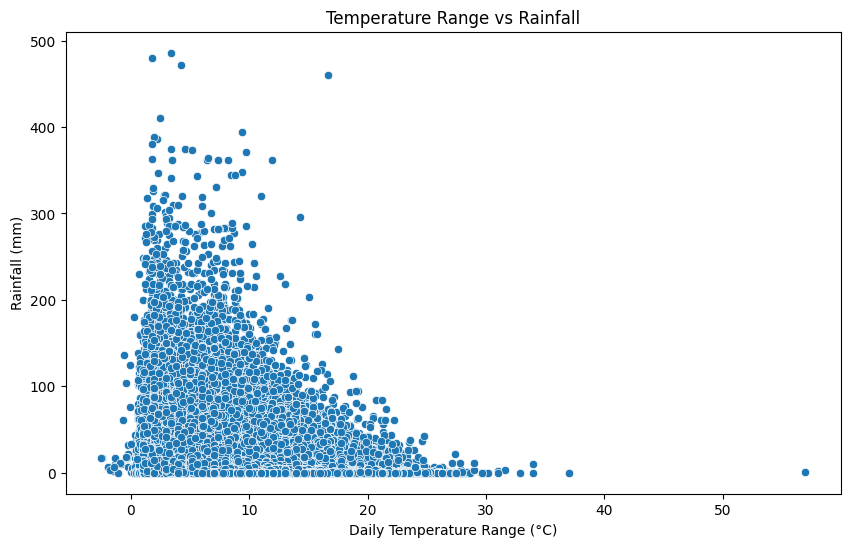

In [152]:
# Is higher rainfall associated with a larger daily temperature range (max_temp - min_temp)?
df['temp_range'] = df['max_temp'] - df['min_temp']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_range', y='rainfall', data=df)
plt.title('Temperature Range vs Rainfall')
plt.xlabel('Daily Temperature Range (°C)')
plt.ylabel('Rainfall (mm)')
plt.show()

> ### Key Insights
- Temperature Range increases, the amount of rainfall sharply decreases.
- Rainy Days = Stable Temperatures: The highest rainfall events (over 200 mm) occur almost exclusively when the daily temperature range is low (between 0°C and 15°C)
- Days with highest temperature range denotes the clear day where it heats ups the land during daytime and cools down at night

---


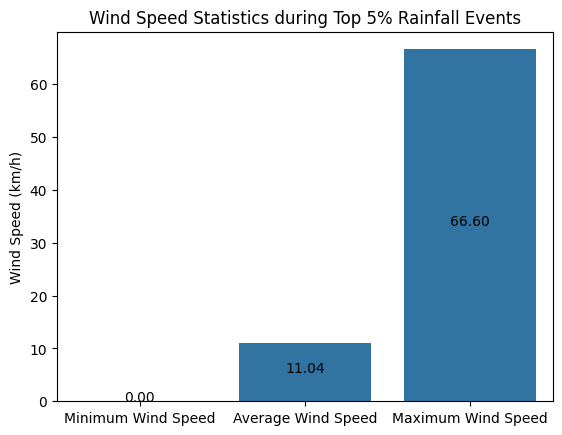

In [160]:
# What is the maximum,minimum and average wind_speed during the top 5% of rainfall events?
top_5_percentile_rainfall = df['rainfall'].quantile(0.95)
avg_wind_speed_top_5_percentile = df[df['rainfall'] >= top_5_percentile_rainfall]['wind_speed'].mean()
min_wind_speed_top_5_percentile = df[df['rainfall'] >= top_5_percentile_rainfall]['wind_speed'].min()
max_wind_speed_top_5_percentile = df[df['rainfall'] >= top_5_percentile_rainfall]['wind_speed'].max()
plt.Figure(figsize=(10, 6))
labels = ['Minimum Wind Speed', 'Average Wind Speed', 'Maximum Wind Speed']
values = [min_wind_speed_top_5_percentile, avg_wind_speed_top_5_percentile, max_wind_speed_top_5_percentile]
ax = sns.barplot(x=labels, y=values)
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='center', padding=3)
plt.title('Wind Speed Statistics during Top 5% Rainfall Events')
plt.ylabel('Wind Speed (km/h)')
plt.show()

> ### Key Insights
- These results show that the heaviest rainfall events can occur under a wide range of wind conditions
- Perfectly calm ($0.00 \text{ km/h}$) to very high winds ($69.80 \text{ km/h}$), with the average being a moderate $31.77 \text{ km/h}$.
---

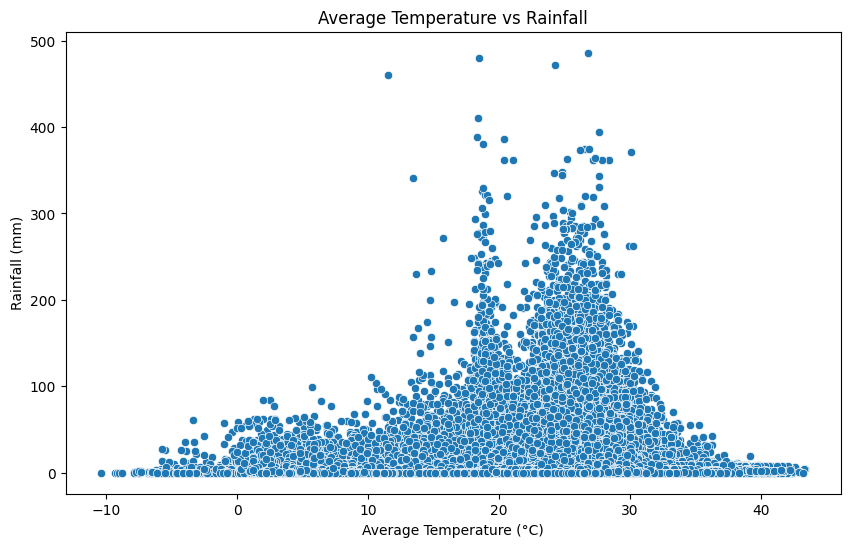

In [ ]:
# Is there a specific avg_temp range where rainfall is most likely to occur?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='rainfall', data=df)
plt.title('Average Temperature vs Rainfall')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.show()

> ### Key Insights
- The vast majority of rainfall, and virtually all heavy rainfall events (over 200 mm), occur within a specific temperature range: roughly 10°C to 30°C.
- Below 10°C rainfall is almost low as well as in above 30°C
---

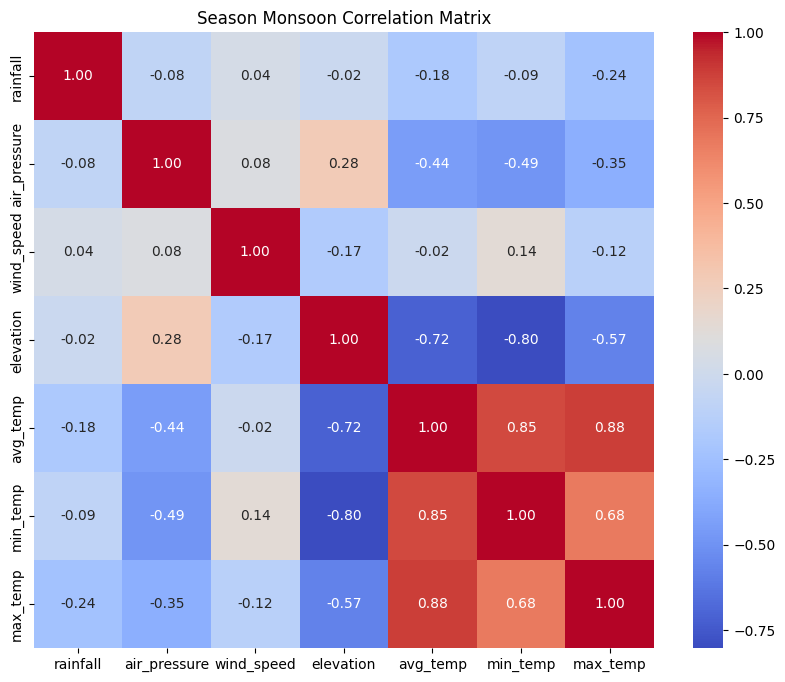

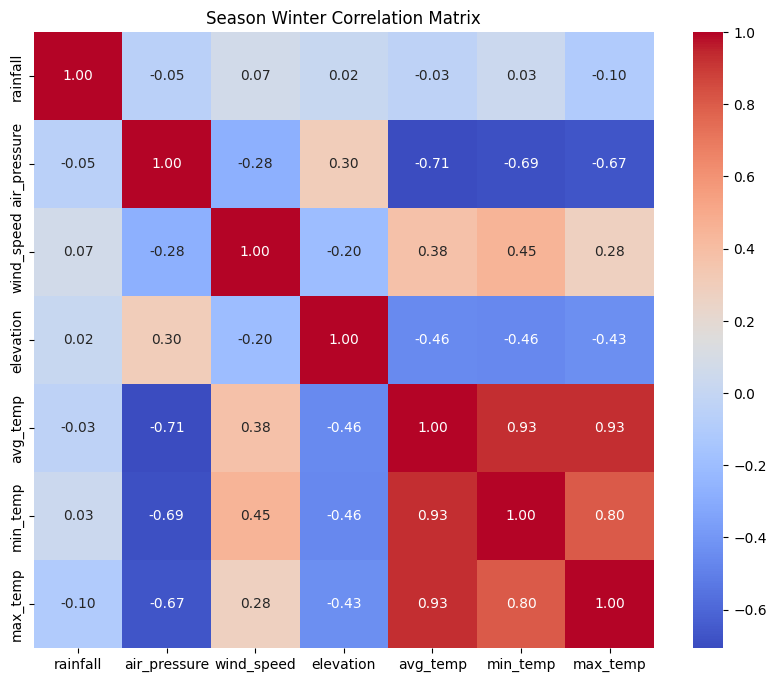

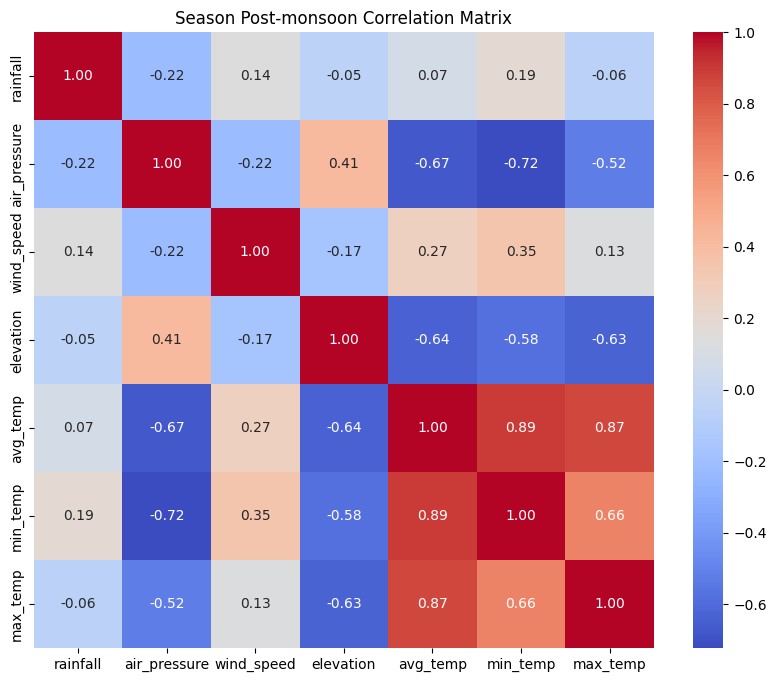

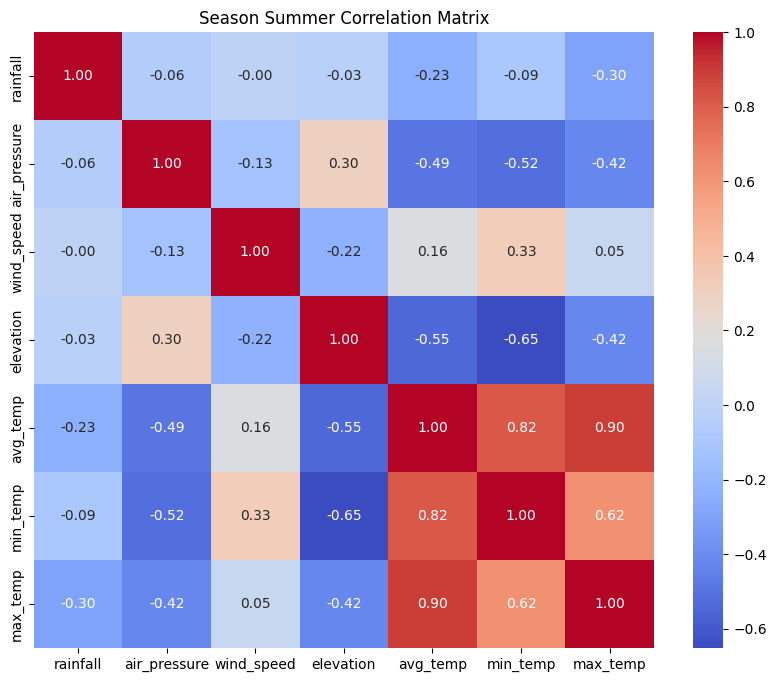

In [260]:
# How does the correlation between rainfall and air_pressure,windspeed and elevation differ between different seasons?
monsoon_data = df[df['season'] == 'Monsoon']
winter_data = df[df['season'] == 'Winter']
postmonsoon_data = df[df['season'] == 'Post-monsoon']
summer_data = df[df['season'] == 'Summer']

postmonsoon_corr = postmonsoon_data[['rainfall', 'air_pressure', 'wind_speed', 'elevation', 'avg_temp', 'min_temp', 'max_temp']].corr()
summer_corr = summer_data[['rainfall', 'air_pressure', 'wind_speed', 'elevation', 'avg_temp', 'min_temp', 'max_temp']].corr()
monsoon_corr = monsoon_data[['rainfall', 'air_pressure', 'wind_speed', 'elevation', 'avg_temp', 'min_temp', 'max_temp']].corr()
winter_corr = winter_data[['rainfall', 'air_pressure', 'wind_speed', 'elevation', 'avg_temp', 'min_temp', 'max_temp']].corr()
season_list = ['Monsoon', 'Winter', 'Post-monsoon', 'Summer']
corr_list = [monsoon_corr, winter_corr, postmonsoon_corr, summer_corr]

for i in range(4):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_list[i], annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Season {season_list[i]} Correlation Matrix')
    plt.show()

> ### Key Insights
#### 1. Monsoon season:
- Rainfall doesn't have ant strong correlation with any other variables
- The strongest correlations are between elevation and temperature(-0.80 with minimum temperature). This confirms that higher altitudes are significantly colder.
- avg_temp, min_temp, and max_temp are all very strongly correlated with each other, as expected.
- Air pressure has a moderate negative link with temperature (e.g., -0.49 vs. min_temp), suggesting higher pressure is associated with cooler weather during the Monsoon.
#### 2. Winter season
- Rainfall don't have any strong correlation with any other variables
- There is a strong negative link between air_pressure and temperature (e.g., -0.71 vs. avg_temp). This means that high-pressure bring cold, clear weather.
- Elevation has a moderate negative correlation with temperature (e.g., -0.46 vs. avg_temp), confirming that higher altitudes are colder.
-Wind_speed shows a moderate positive link to temperature (e.g., +0.45 vs. min_temp), suggesting that warmer periods in winter tend to be windier.
#### 3. Post-Monsoon season
- The strongest relationship is between air_pressure and temperature. High pressure is strongly linked to colder weather (e.g., a -0.72 correlation with min_temp).
- The second strongest link is between elevation and temperature. Higher elevations are clearly associated with colder weather (e.g., a -0.64 correlation with avg_temp).
- Others are weak relations compared to this

#### 4. Summer season
- Rainfall has its strongest (but still weak) correlation with max_temp (-0.30). This suggests that the very hottest summer days tend to have less rain.
- The chart's strongest relationship is between elevation and min_temp (-0.65). This clearly shows that higher altitudes stay significantly cooler, especially at night.
- Air_pressure has a moderate negative link with all temperature variables (e.g., -0.52 vs. min_temp). This indicates that higher pressure systems in summer are associated with cooler weather.
- Wind_speed shows a weak positive correlation with temperature (e.g., +0.33 vs. min_temp), suggesting that warmer summer days tend to be slightly windier.
---
---
---

> # Summary 
> - The single most important finding is that rainfall is a complex event that cannot be predicted by any single factor. There is no simple rule like "higher elevation" or "higher temperature" that equals more rain. Instead, rainfall depends on a specific combination of conditions.
> #### Insights about Rain and seasons/months
> - The Monsoon season is the dominant rainy period, with the highest number of rainy days and the highest average rainfall.
> - July is the wettest month, both for average rainfall amount and the total number of rainy days.
> - February is the driest month, with the least amount of rain and the fewest rainy days.
> - Elevation alone is not the factor, it can rain on any elevation
> #### Rain in different Location
> - Arunachal Pradesh (AR) and Sikkim (SK) have the highest average daily rainfall.
> - Maharashtra (MH) is a had the most extreme rain, with more than double the number of extreme rainfall days of the next closest state, Karnataka (KA). 
> - Rainfall is not just a mountain phenomenon. The top 10 rainiest stations include both high-elevation locations (like Mukteshwar and Cherrapunji) and sea-level coastal cities (like Bombay and Goa).
> #### Occurence of Rain
> - It is more common for a day to have some rain than no rain at all (62% of days are rainy).
> - When it does rain, it is overwhelmingly light-to-moderate (0-50mm)
> - Heavy rain is very rare occurence 
> #### Correlations
> - Air pressure, Average temperature, Temperature range has the strongest relation with rainfall in this dataset
> - Temperature range : Heavy rain = small range... No rain = Large range
>
> ---